In [ ]:
import pandas as pd

raw_df = pd.read_csv('insurance.csv')
raw_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
def bmi_category(bmi):
  if bmi < 18.5:
    return "underweight"
  elif (18.5 <= bmi < 25):
    return "normal"
  elif (25 <= bmi < 30):
    return "overweight"
  elif bmi >= 30:
    return "obese"

raw_df['bmi_category'] = raw_df['bmi'].apply(bmi_category)

In [ ]:
raw_df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [ ]:
raw_df[raw_df['bmi_category'] == 'normal'].max()

,0
age,64
sex,male
bmi,24.985
children,5
smoker,yes
region,southwest
charges,35069.37452
bmi_category,normal


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
raw_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category'],
      dtype='object')

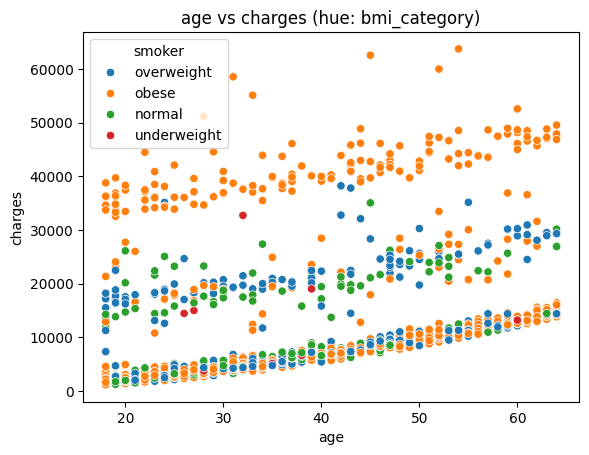

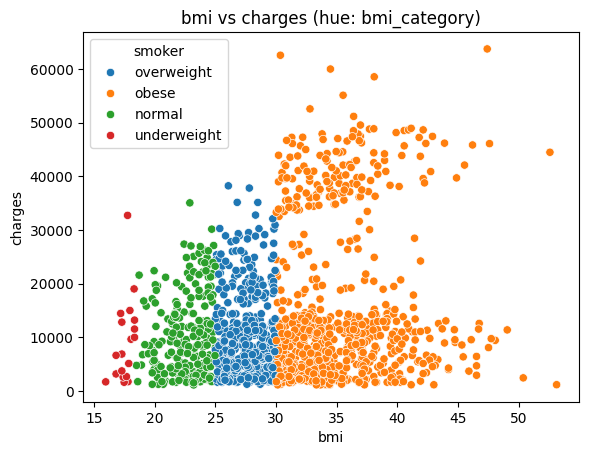

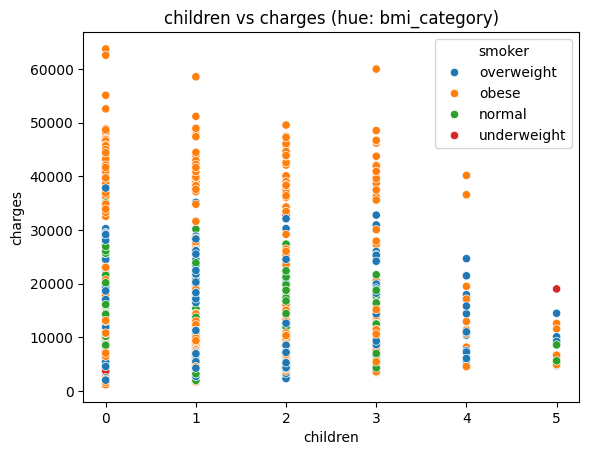

In [ ]:
numerical_cols = ['age', 'bmi', 'children']
for col in numerical_cols:
    plt.figure()
    sns.scatterplot(x=col, y='charges', hue='bmi_category', data=raw_df)
    plt.title(f'{col} vs charges (hue: bmi_category)')
    plt.xlabel(col)
    plt.ylabel('charges')
    plt.legend(title='smoker')
    plt.show()


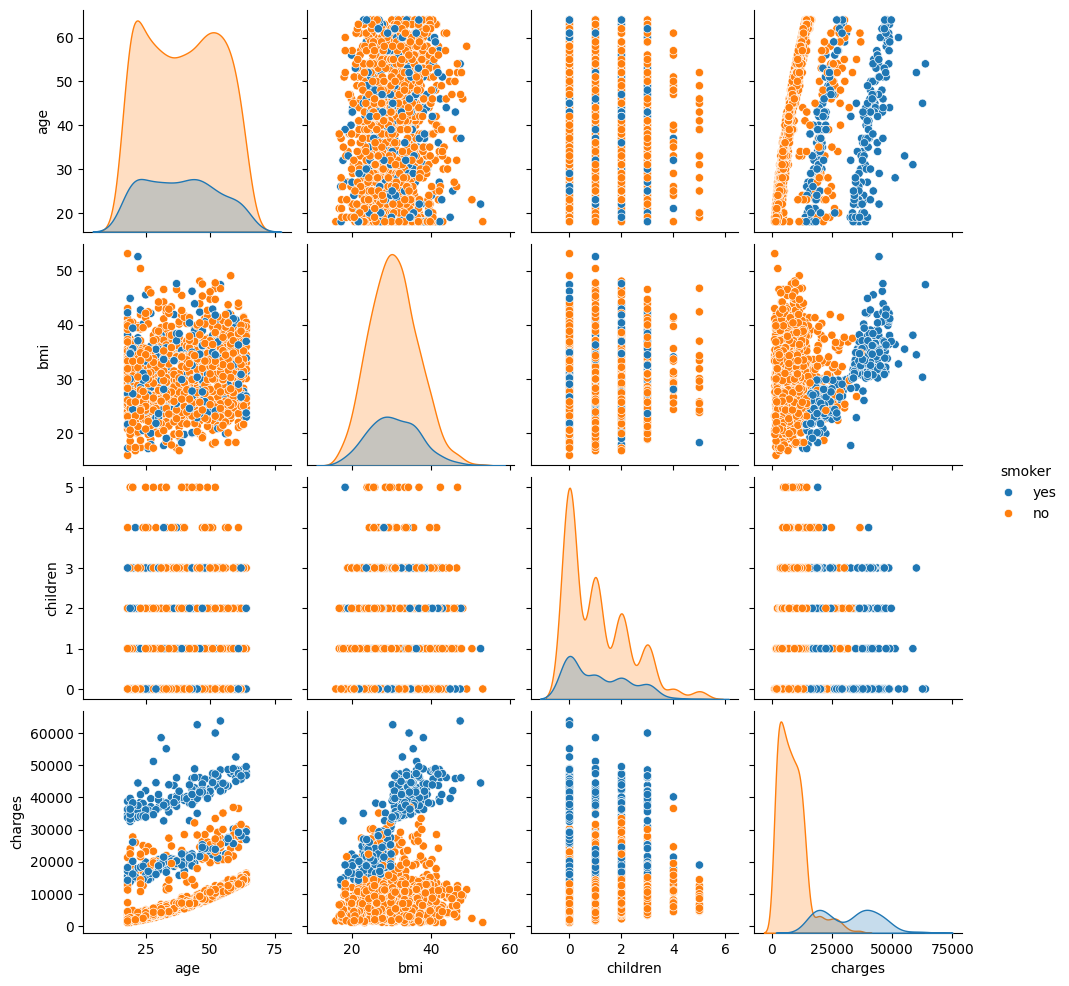

In [ ]:
sns.pairplot(raw_df, hue = 'smoker')
plt.show()

In [ ]:
raw_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

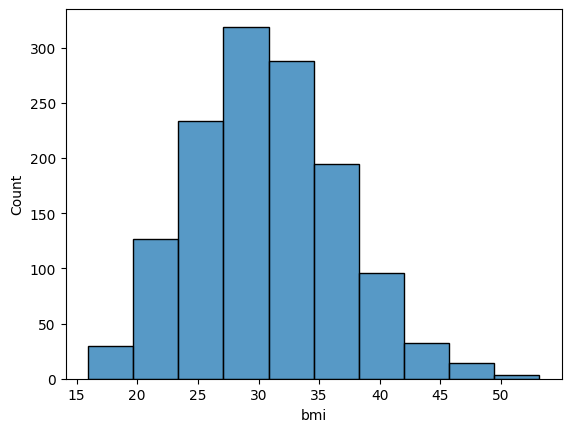

In [ ]:
sns.histplot(raw_df['bmi'], bins=10)
plt.show()

In [ ]:
ins = raw_df[['bmi', 'charges']][raw_df['smoker']== 'no'].sort_values(by='bmi')
ins

,bmi,charges
172,15.960,1694.79640
428,16.815,3167.45585
1226,16.815,6640.54485
1286,17.290,3732.62510
1029,17.290,6877.98010
...,...,...
1088,47.740,9748.91060
286,48.070,9432.92530
116,49.060,11381.32540
847,50.380,2438.05520


In [ ]:
ins

,bmi,charges
172,15.960,1694.79640
428,16.815,3167.45585
1226,16.815,6640.54485
1286,17.290,3732.62510
1029,17.290,6877.98010
...,...,...
1088,47.740,9748.91060
286,48.070,9432.92530
116,49.060,11381.32540
847,50.380,2438.05520


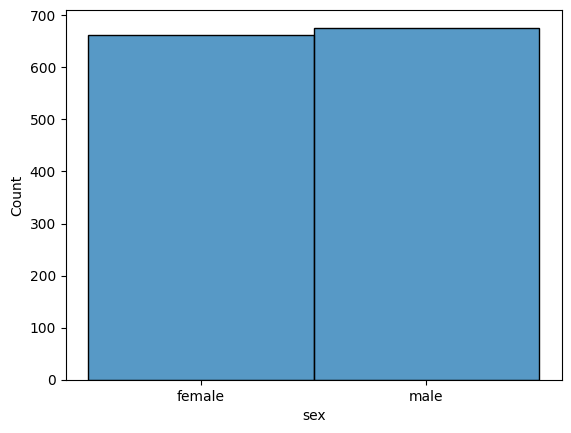

In [ ]:
sns.histplot(raw_df['sex'], bins=10)
plt.show()

In [ ]:
df = raw_df.copy()

In [ ]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df['bmi_category'] = df['bmi_category'].map({'underweight': 0, 'normal': 1, 'overweight': 2, 'obese': 3})

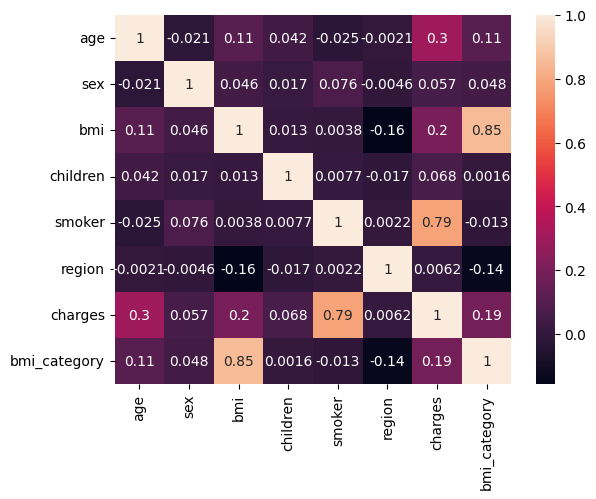

In [ ]:
sns.heatmap(df.corr('pearson'), annot=True)
plt.show()

In [ ]:
df.corr('pearson')

,age,sex,bmi,children,smoker,region,charges,bmi_category
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008,0.108115
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292,0.047730
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341,0.851683
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998,0.001578
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251,-0.012694
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208,-0.136315
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000,0.186774
bmi_category,0.108115,0.047730,0.851683,0.001578,-0.012694,-0.136315,0.186774,1.000000


In [ ]:
##charges v age = weak correlation
##charges v bmi = weak
##charges v smoker = very strong correlation

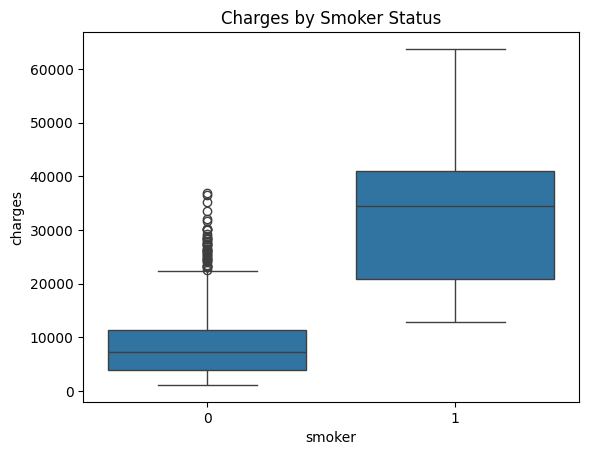

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()


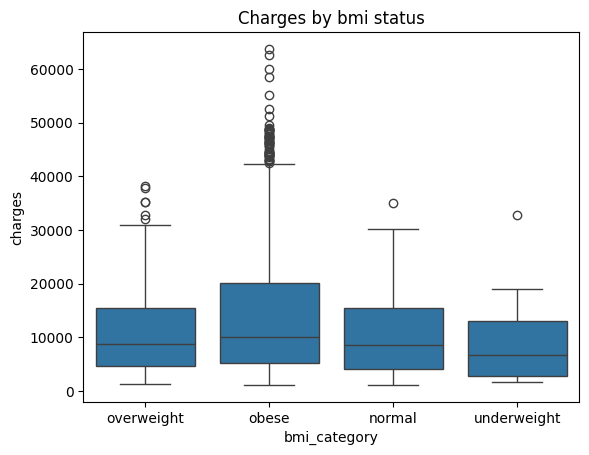

In [ ]:
sns.boxplot(x='bmi_category', y='charges', data=raw_df)
plt.title('Charges by bmi status')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, max_error
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.linear_model import LinearRegression, RANSACRegressor,Ridge,Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['charges'], axis=1), df['charges'], test_size=0.20, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

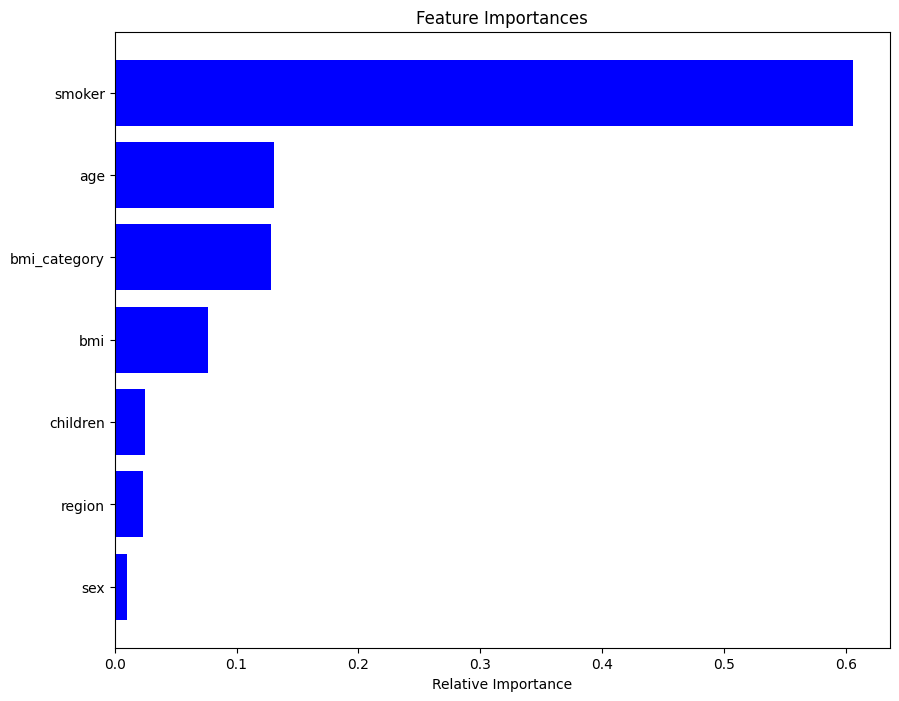

In [ ]:
model = ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train_sc, y_train)

# plotting feature importances
features = df.drop('charges', axis = 1).columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
y_train

,charges
621,40182.24600
194,1137.46970
240,38511.62830
1168,4670.64000
1192,13019.16105
...,...
763,3070.80870
835,7160.33030
1216,5415.66120
559,1646.42970


In [ ]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
regressors = [
    SGDRegressor(),
    RANSACRegressor(),
    KNeighborsRegressor(),
    LinearRegression(),
    Ridge(),
    ExtraTreesRegressor(),
    BaggingRegressor(estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    BaggingRegressor(estimator=RandomForestRegressor()),
    GradientBoostingRegressor(),
    BaggingRegressor(estimator=GradientBoostingRegressor()),
    AdaBoostRegressor(),
    KNeighborsRegressor()

]

In [ ]:
#Creating a ML performance DataFrame
performance_df = pd.DataFrame(columns = ['train_time', "pred_time", "train_score", "test_score", "ml_model"])

In [ ]:
head = 15
for model in regressors[:head]:
    start = time()
    model.fit(X_train_sc, y_train)
    train_score = model.score(X_train_sc, y_train)
    train_time = time() - start
    mx = float(97/100)
    start = time()
    for num in range(10):
        y_pred = model.predict(X_test_sc)
        test_score = r2_score(y_test, y_pred)
        if(test_score > mx):
            mx = test_score
            print(mx)
    #start = time()
    #y_pred = model.predict(test_X)
    predict_time = time()-start
    performance_df.loc[regressors.index(model)] = [train_time, predict_time, train_score, test_score, str(model)]
    if(test_score>0.96):
        print(model)
        print("\tTraining time: %0.3fs" % train_time)
        print("\tPrediction time: %0.3fs" % predict_time)
        print("\tExplained variance:", explained_variance_score(y_test, y_pred))
        print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
        print("\tMean squared error:", mean_squared_error(y_test,y_pred))
        print("\tR2 training score:", model.score(X_train_sc, y_train))
        print("\tR2 test score:", r2_score(y_test, y_pred))
        print("\tR2 Maximum Error:", max_error(y_test, y_pred))
        print()
print('Simulation Completed')

Simulation Completed


In [ ]:
performance_df.sort_values(by=['train_score', 'test_score'], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model
5,0.465450,0.190038,0.998296,0.866891,ExtraTreesRegressor()
8,0.009557,0.012840,0.998296,0.640130,DecisionTreeRegressor()
9,0.897588,0.246972,0.973886,0.872408,RandomForestRegressor()
6,2.958030,2.246521,0.969504,0.881136,BaggingRegressor(estimator=ExtraTreesRegressor())
10,3.989531,1.607715,0.939829,0.891618,BaggingRegressor(estimator=RandomForestRegress...
7,0.240860,0.033257,0.938995,0.880928,GradientBoostingRegressor(learning_rate=0.3)
11,0.162803,0.017067,0.897353,0.898154,GradientBoostingRegressor()
12,7.537649,0.551102,0.893910,0.900140,BaggingRegressor(estimator=GradientBoostingReg...
2,0.016203,0.043862,0.883682,0.872689,KNeighborsRegressor()
14,0.067287,0.224399,0.883682,0.872689,KNeighborsRegressor()


In [ ]:
performance_df['varr'] = performance_df['train_score'] - performance_df['test_score']
performance_df.sort_values(by=['train_score', 'test_score','varr'], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model,varr
5,0.465450,0.190038,0.998296,0.866891,ExtraTreesRegressor(),0.131405
8,0.009557,0.012840,0.998296,0.640130,DecisionTreeRegressor(),0.358166
9,0.897588,0.246972,0.973886,0.872408,RandomForestRegressor(),0.101478
6,2.958030,2.246521,0.969504,0.881136,BaggingRegressor(estimator=ExtraTreesRegressor()),0.088369
10,3.989531,1.607715,0.939829,0.891618,BaggingRegressor(estimator=RandomForestRegress...,0.048211
7,0.240860,0.033257,0.938995,0.880928,GradientBoostingRegressor(learning_rate=0.3),0.058067
11,0.162803,0.017067,0.897353,0.898154,GradientBoostingRegressor(),-0.000801
12,7.537649,0.551102,0.893910,0.900140,BaggingRegressor(estimator=GradientBoostingReg...,-0.006230
2,0.016203,0.043862,0.883682,0.872689,KNeighborsRegressor(),0.010993
14,0.067287,0.224399,0.883682,0.872689,KNeighborsRegressor(),0.010993


In [ ]:
# Runing iterations to get best R2 score
param=[]
best_regress = BaggingRegressor(estimator=ExtraTreesRegressor())
best_mx = float(881/1000)

best_regress.fit(X_train_sc, y_train)

while(best_mx <= 0.8890):
    start = time()
    best_regress.fit(X_train_sc, y_train)
    train_time = time() - start
    start = time()
    y_pred = best_regress.predict(X_test_sc)
    test_score = r2_score(y_test, y_pred)
    # print(test_score)
    if(test_score > best_mx):
        best_mx = test_score
        print(best_mx)
    predict_time = time()-start

    print(best_regress)
    print("\tTraining time= %0.3fs" % train_time)
    print("\tPrediction time= %0.3fs" % predict_time)
    print("\tExplained variance=", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error=", mean_absolute_error(y_test, y_pred))
    print("\tMean squared error=", mean_squared_error(y_test,y_pred))
    print("\tR2 training score=", best_regress.score(X_train_sc, y_train))
    print("\tR2 test score=", best_mx)
    print("\tR2 Maximum Error:", max_error(y_test, y_pred))

print()



0.8817903687540193
BaggingRegressor(estimator=ExtraTreesRegressor())
	Training time= 2.696s
	Prediction time= 0.168s
	Explained variance= 0.8849977722856884
	Mean absolute error= 2553.1958941692346
	Mean squared error= 18810694.16628527
	R2 training score= 0.9729611846634119
	R2 test score= 0.8817903687540193
	R2 Maximum Error: 24568.906641229987
BaggingRegressor(estimator=ExtraTreesRegressor())
	Training time= 5.067s
	Prediction time= 0.331s
	Explained variance= 0.8843854293238305
	Mean absolute error= 2614.2001813037273
	Mean squared error= 19006412.049473662
	R2 training score= 0.9730902378842164
	R2 test score= 0.8817903687540193
	R2 Maximum Error: 25771.763225759983
0.881980313964877
BaggingRegressor(estimator=ExtraTreesRegressor())
	Training time= 3.755s
	Prediction time= 0.164s
	Explained variance= 0.8854897159975466
	Mean absolute error= 2576.6359483450833
	Mean squared error= 18780468.19203822
	R2 training score= 0.971171100584873
	R2 test score= 0.881980313964877
	R2 Maximum 

In [ ]:
best_score = str(round(best_mx*10000))
best_score

'8903'

In [ ]:
import pickle

# Saving the best regressor as a pickle file
best_score = str(round(best_mx*10000))
model_name = "best_regress_" + best_score +".pkl"
pickle.dump(best_regress, open(model_name, 'wb')) # stored as binary file
model_name

'best_regress_8903.pkl'

In [ ]:
import pickle

# Importing the best regressor as a pickle file
model_name = 'best_regress_8903.pkl'
pickled_model = pickle.load(open(model_name, 'rb')) # read as binary file


In [ ]:
pickled_model

BaggingRegressor(estimator=ExtraTreesRegressor())

In [ ]:
pickled_model.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__bootstrap': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1.0,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': ExtraTreesRegressor(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
X_test

,age,sex,bmi,children,smoker,region,bmi_category
578,52,1,30.200,1,0,0,3
610,47,0,29.370,1,0,1,2
569,48,1,40.565,2,1,2,3
1034,61,1,38.380,0,0,2,3
198,51,0,18.050,0,0,2,0
...,...,...,...,...,...,...,...
1084,62,0,30.495,2,0,2,3
726,41,1,28.405,1,0,2,2
1132,57,1,40.280,0,0,3,3
725,30,0,39.050,3,1,1,3


In [ ]:
X_test['Actual_charges'] = y_test
X_test['Predicted_charges'] = pickled_model.predict(X_test_sc)

In [ ]:
X_test

,age,sex,bmi,children,smoker,region,bmi_category,Actual_charges,Predicted_charges
578,52,1,30.200,1,0,0,3,9724.53000,10432.303501
610,47,0,29.370,1,0,1,2,8547.69130,10151.761077
569,48,1,40.565,2,1,2,3,45702.02235,45342.027094
1034,61,1,38.380,0,0,2,3,12950.07120,13184.474556
198,51,0,18.050,0,0,2,0,9644.25250,11175.643894
...,...,...,...,...,...,...,...,...,...
1084,62,0,30.495,2,0,2,3,15019.76005,16842.940971
726,41,1,28.405,1,0,2,2,6664.68595,6609.804515
1132,57,1,40.280,0,0,3,3,20709.02034,11497.987054
725,30,0,39.050,3,1,1,3,40932.42950,44869.188959


In [ ]:
fin_df = X_test.copy()

In [ ]:
fin_df['sex'] = fin_df['sex'].map({0:'female', 1:'male'})
fin_df['smoker'] = fin_df['smoker'].map({0:'no', 1:'yes'})
fin_df['region'] = fin_df['region'].map({0:'southwest', 1:'southeast', 2:'northwest', 3:'northeast'})
fin_df['bmi_category'] = fin_df['bmi_category'].map({0:'underweight', 1:'normal', 2:'overweight', 3:'obese'})

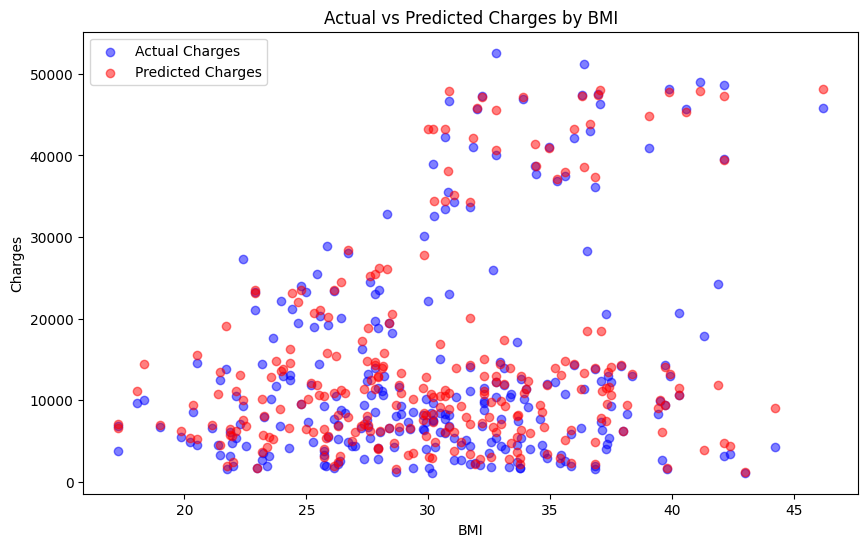

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(fin_df['bmi'], fin_df['Actual_charges'], color='blue', alpha=0.5, label='Actual Charges')
plt.scatter(fin_df['bmi'], fin_df['Predicted_charges'], color='red', alpha=0.5, label='Predicted Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title(f'Actual vs Predicted Charges by BMI')
plt.legend()
plt.show()


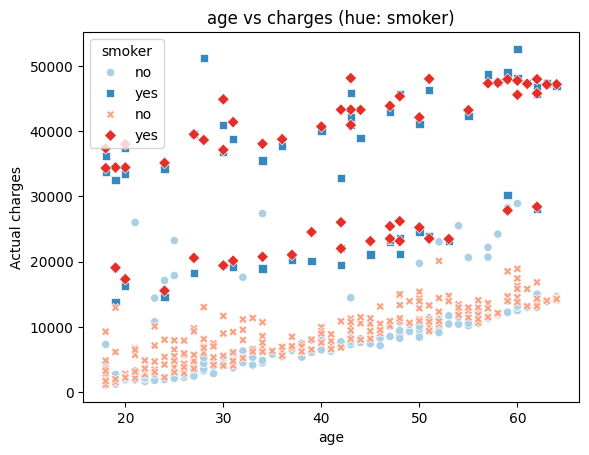

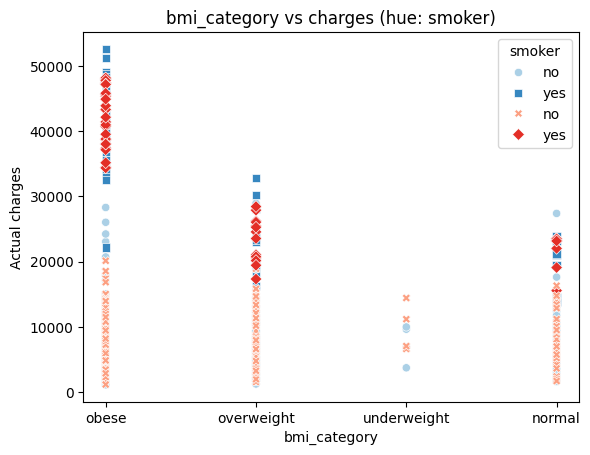

In [ ]:
numerical_cols = ['age', 'bmi_category']
for col in numerical_cols:
    plt.figure()
    sns.scatterplot(x=col, y='Actual_charges', hue='smoker', data=fin_df,
                    style='smoker', markers=['o', 's'], palette='Blues')
    sns.scatterplot(x=col, y='Predicted_charges', hue='smoker', data=fin_df,
                    style='smoker', markers=['X', 'D'], palette='Reds')
    plt.title(f'{col} vs charges (hue: smoker)')
    plt.xlabel(col)
    plt.ylabel('Actual charges')
    plt.legend(title='smoker')
    plt.show()

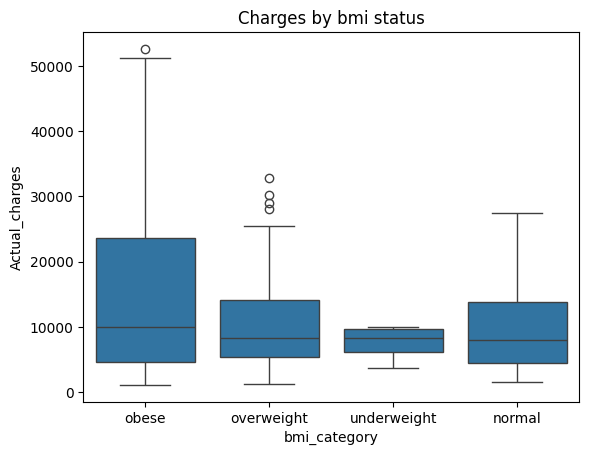

In [ ]:
sns.boxplot(x='bmi_category', y='Actual_charges', data=fin_df)
#sns.boxplot(x='bmi_category', y='Predicted_charges', data=fin_df)
plt.title('Charges by bmi status')
plt.show()


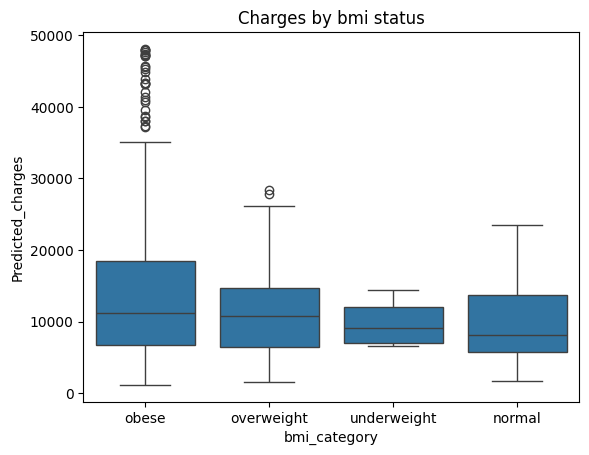

In [ ]:
sns.boxplot(x='bmi_category', y='Predicted_charges', data=fin_df)
plt.title('Charges by bmi status')
plt.show()

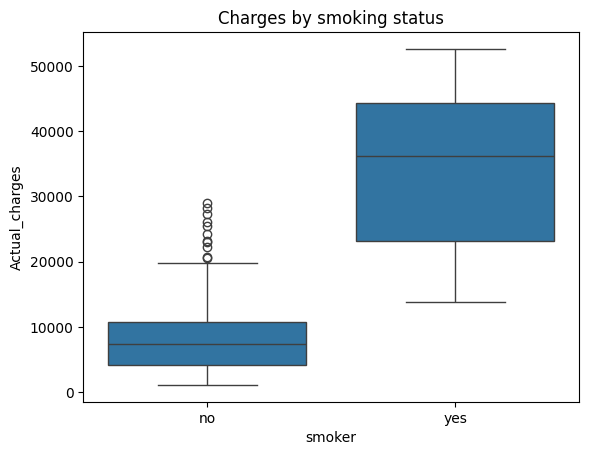

In [ ]:
sns.boxplot(x='smoker', y='Actual_charges', data=fin_df)
#sns.boxplot(x='bmi_category', y='Predicted_charges', data=fin_df)
plt.title('Charges by smoking status')
plt.show()

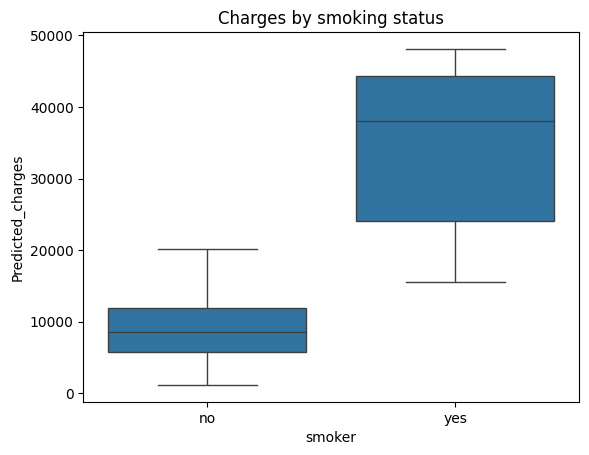

In [ ]:
sns.boxplot(x='smoker', y='Predicted_charges', data=fin_df)
#sns.boxplot(x='bmi_category', y='Predicted_charges', data=fin_df)
plt.title('Charges by smoking status')
plt.show()

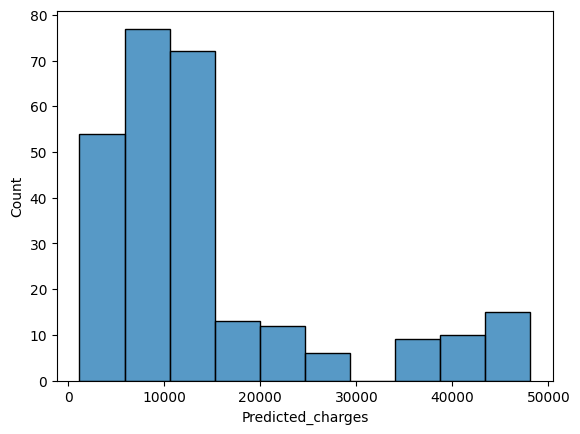

In [ ]:
sns.histplot(fin_df['Predicted_charges'].sort_values(ascending=True), bins=10)
plt.show()

In [ ]:
median_df = fin_df.groupby('bmi_category')[['Predicted_charges', 'Actual_charges']].median().reset_index()
median_df


,bmi_category,Predicted_charges,Actual_charges
0,normal,8071.616005,7986.47525
1,obese,11159.227893,9964.06000
2,overweight,10756.121943,8360.99850
3,underweight,9116.513833,8261.11630


In [ ]:
median_df = fin_df.groupby('bmi')[['Predicted_charges', 'Actual_charges']].median().reset_index()
median_df


,bmi,Predicted_charges,Actual_charges
0,17.290,6841.426133,5305.30260
1,18.050,11175.643894,9644.25250
2,18.335,14421.421553,9991.03765
3,19.000,6994.755698,6753.03800
4,19.855,6201.320822,5458.04645
...,...,...,...
194,42.130,39503.078476,39611.75770
195,42.400,4362.611293,3410.32400
196,43.010,1171.673466,1149.39590
197,44.220,9000.229696,4266.16580


In [ ]:
median_df = fin_df.groupby('smoker')[['Predicted_charges', 'Actual_charges']].median().reset_index()
median_df


,smoker,Predicted_charges,Actual_charges
0,no,8605.782492,7325.0482
1,yes,37992.601916,36149.4835


In [ ]:
std_actual = fin_df['Actual_charges'].std()
print(f"Standard deviation of actual charges: {std_actual}")


Standard deviation of actual charges: 12638.273406220218


In [ ]:
diff = (fin_df['Predicted_charges'] - fin_df['Actual_charges']).abs()
diff

,0
578,707.773501
610,1604.069777
569,359.995256
1034,234.403356
198,1531.391394
...,...
1084,1823.180921
726,54.881435
1132,9211.033286
725,3936.759459


In [ ]:
within_std = diff <= std_actual
percentage_within_std = within_std.mean() * 100
print(f"Percentage of predictions within one standard deviation of actual: {percentage_within_std:.2f}%")


Percentage of predictions within one standard deviation of actual: 97.39%


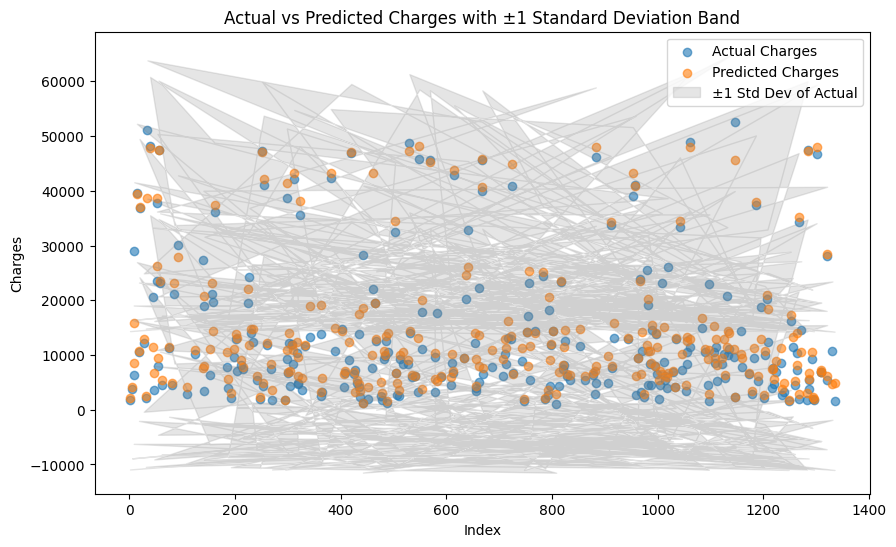

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(fin_df.index, fin_df['Actual_charges'], label='Actual Charges', alpha=0.6)
plt.scatter(fin_df.index, fin_df['Predicted_charges'], label='Predicted Charges', alpha=0.6)
plt.fill_between(fin_df.index,
                 fin_df['Actual_charges'] - std_actual,
                 fin_df['Actual_charges'] + std_actual,
                 color='gray', alpha=0.2, label='±1 Std Dev of Actual')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Charges with ±1 Standard Deviation Band')
plt.show()


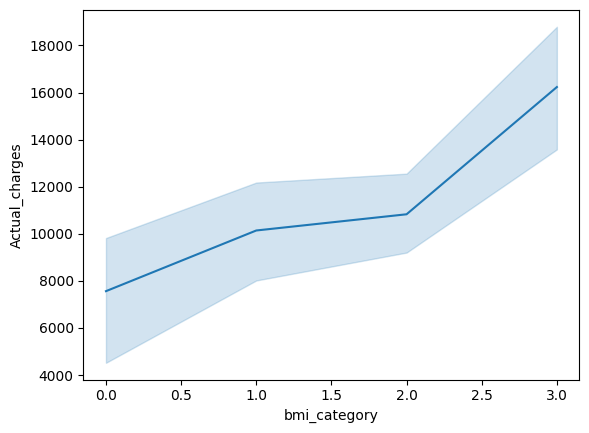

In [ ]:
viz_df = X_test.copy()
sns.lineplot(x='bmi_category', y='Actual_charges', data=viz_df)
plt.show()

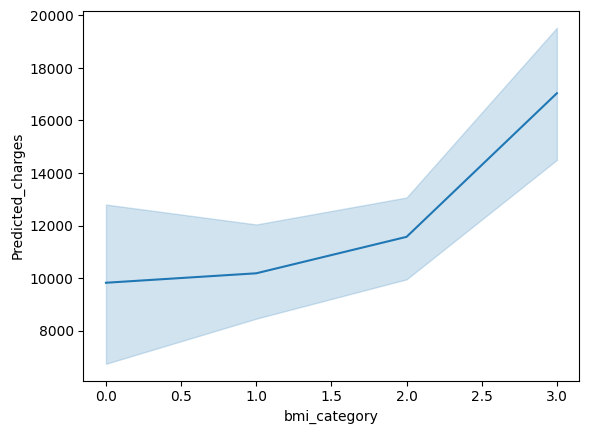

In [ ]:
viz_df = X_test.copy()
sns.lineplot(x='bmi_category', y='Predicted_charges', data=viz_df)
plt.show()